In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math as math
import random as rd
rd.seed(123)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
filters_pi_prev=pd.read_csv('/home/jsanmar/Downloads/filters_pi_full_filtered.csv')
filters_pi=filters_pi_prev.loc[filters_pi_prev["STORE_NUMBER"] != 1020]
print(filters_pi_prev.shape)
print(filters_pi.shape)
print(filters_pi.SKU_NUMBER.nunique())

(16228766, 36)
(16228180, 36)
4304


In [3]:
filters_pi

,SKU_NUMBER,STORE_NUMBER,APPLICATION_COUNT,ESTABLISHMENTS,SKU_EXISTENCE_PY,SKU_STORE_PDQ_PY,TOTAL_VIO_PY,UNADJUSTED_TOTAL_VIO_PY,SS_SALES_PY,AVG_CLUSTER_UNIT_SALES_PY,...,ppy_gross_sales,py_sales_cost,ppy_sales_cost,LOOKUP_CNT_PY,WEIGHTED_LOOKUP_CNT_PY,py_qty_sold_transfer,py_qty_sold_on_hand,ppy_qty_sold_transfer,ppy_qty_sold_on_hand,fy_ts_forecast
0,5792231,2127,306,391.12,11,11,40.151981,3380.0,0.0,1.07,...,26.96,7.05,7.33,0.0,0.0,0.0,3.0,0.0,4.0,4629.0
1,10162622,4810,13,495.39,11,11,1.001354,230.0,0.0,0.00,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,52.0
2,5792231,4165,306,397.98,11,11,40.958593,2498.0,0.0,1.45,...,5.95,0.00,1.68,0.0,0.0,0.0,0.0,0.0,1.0,4629.0
3,10162622,1039,13,186.72,11,11,0.546644,57.0,0.0,0.00,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,52.0
4,5792231,4500,306,414.78,11,11,46.369579,6725.0,0.0,1.31,...,13.98,9.40,3.36,0.0,0.0,0.0,4.0,0.0,2.0,4629.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16228761,10972414,6967,21,194.58,11,11,0.428148,24.0,0.0,0.00,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,11.0
16228762,10972414,7471,21,130.10,11,11,0.021816,15.0,0.0,0.00,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,11.0
16228763,10972414,7775,21,672.87,11,11,1.269393,32.0,0.0,0.00,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,11.0
16228764,10972414,8409,21,450.59,11,11,0.162839,19.0,0.0,0.00,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,11.0


In [9]:
# EVALUATING AN EXAMPLE
filters_pi_5792231=filters_pi.loc[filters_pi["SKU_NUMBER"] == 5792231, ["QTY_SOLD_CY"]]
filters_pi_5792231.describe()

,QTY_SOLD_CY
count,3901.000000
mean,0.977442
std,1.213177
min,-3.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,18.000000


In [10]:
# EVALUATING A 2ND EXAMPLE
filters_pi_10972414=filters_pi.loc[filters_pi["SKU_NUMBER"] == 10972414, ["QTY_SOLD_CY"]]
filters_pi_10972414.describe()

# SKUS SAles are present in different number of stores per each one

,QTY_SOLD_CY
count,2901.000000
mean,0.001379
std,0.052504
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2.000000


/apps/cent7/jupyterhub/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


array([[<AxesSubplot:title={'center':'QTY_SOLD_CY'}>]], dtype=object)

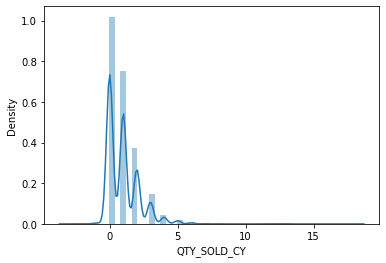

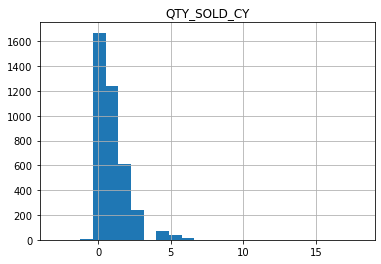

In [11]:
sns.distplot(filters_pi_5792231['QTY_SOLD_CY'])
filters_pi_5792231.hist(bins=24)

/apps/cent7/jupyterhub/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


array([[<AxesSubplot:title={'center':'QTY_SOLD_CY'}>]], dtype=object)

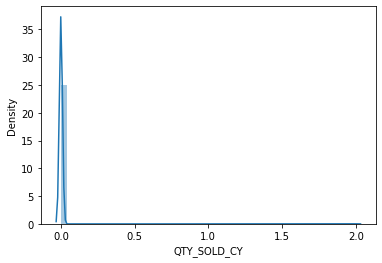

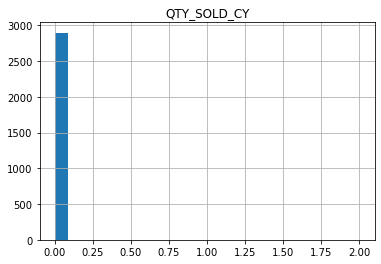

In [12]:
sns.distplot(filters_pi_10972414['QTY_SOLD_CY'])
filters_pi_10972414.hist(bins=24)

In [3]:
stats2 = filters_pi.groupby(['SKU_NUMBER'])['QTY_SOLD_CY'].agg(['sum', 'mean', 'max'])
print(stats2)
print(type(stats2))
stats2_0=stats2.loc[stats2["sum"] == 0, ["sum"]]
list_skus_0 = stats2_0.index.unique().tolist()
n_final_0 = len(list_skus_0)
print(n_final_0)

               sum      mean   max
SKU_NUMBER                        
3110024        0.0  0.000000   0.0
3231054     4020.0  1.030505  24.0
3231062      667.0  0.170982   5.0
3231070     2947.0  0.755447  25.0
3231089      202.0  0.051782   2.0
...            ...       ...   ...
26983429       0.0  0.000000   0.0
26983438       0.0  0.000000   0.0
26983458       0.0  0.000000   0.0
99991111       1.0  0.000353   1.0
99995830     683.0  0.175083  21.0

[4304 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
59


In [4]:
stats2.describe()

,sum,mean,max
count,4304.000000,4304.000000,4304.000000
mean,1067.981413,0.274015,13.318076
std,4074.765143,1.044725,122.103482
min,-3.000000,-0.002004,0.000000
25%,5.000000,0.001538,1.000000
50%,24.000000,0.006152,2.000000
75%,316.250000,0.081069,6.000000
max,104107.000000,26.687260,5704.000000


In [13]:
stats2_0=stats2.loc[((stats2["sum"] <= 500) | (stats2["max"] <= 29)) , ["sum"]]
list_skus_0 = stats2_0.index.unique().tolist()
n_final_0 = len(list_skus_0)
print(n_final_0)

4028


In [27]:
stats2_0=stats2.loc[(stats2["max"] <= 49) , ["sum"]]
list_skus_2 = stats2_0.index.unique().tolist()
n_final_2 = len(list_skus_2)
print(n_final_2)

4112


In [22]:
x=list(set(list_skus_0) - set(list_skus_2))
print(sorted(x))

[3231917, 5130071, 5790010, 5790052, 5790054, 5790344, 5791855, 5792274, 5792347, 10704591, 10704932, 10706760, 10708340, 10709136, 10711519, 10711624, 10857058, 10857059, 10857243, 10857247, 10972638, 10972642, 10975513, 10975542, 10975643, 11349194, 11350101, 11395327, 11495154, 11582255, 11613517, 11638859, 11680452, 11680453, 12006923, 12076221, 17400569, 22880338]


In [25]:
# EVALUATING A "MISSING" EXAMPLE
filters_pi_11495154=filters_pi.loc[filters_pi["SKU_NUMBER"] == 11495154, ["QTY_SOLD_CY"]]
filters_pi_11495154.describe()

,QTY_SOLD_CY
count,3901.000000
mean,0.017944
std,1.105551
min,-1.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,69.000000


In [26]:
# EVALUATING ANOTHER "MISSING" EXAMPLE
filters_pi_10704591=filters_pi.loc[filters_pi["SKU_NUMBER"] == 10704591, ["QTY_SOLD_CY"]]
filters_pi_10704591.describe()

,QTY_SOLD_CY
count,3901.000000
mean,0.043579
std,2.309212
min,-1.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,144.000000


In [46]:
# USING Tukey’s box plot method for Pesky identification
def tukeys_method(df, variable):

    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x < outer_fence_le or x > outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x < inner_fence_le or x > inner_fence_ue:
            outliers_poss.append(index)
    
    n_prob_outliers=len(outliers_prob)
    n_poss_outliers=len(outliers_poss)
    return n_prob_outliers, n_poss_outliers

In [77]:
# Calculating the number of Pesky SKUs using the Tukey’s box plot, extended to the log-IQ method (highly skewed distribution)
list_skus = filters_pi.SKU_NUMBER.unique().tolist()
#Excluding the SKUs that have less or equal than 24 qty as total sales
final_list=list(set(list_skus) - set(list_skus_0))

n=0
pesky_skus_t=[]
for sku in final_list:
    filters_pi_x=filters_pi.loc[filters_pi["SKU_NUMBER"] == sku, ["SKU_NUMBER", "QTY_SOLD_CY"]]
    filters_pi_x['QTY_SOLD_CY_1'] = filters_pi_x['QTY_SOLD_CY']+1
    log_QTY_SOLD_CY = np.log(filters_pi_x['QTY_SOLD_CY_1'])
    filters_pi_x['LOG_QTY_SOLD_CY_1'] = log_QTY_SOLD_CY
    n_prob_o_x, n_poss_o_x = tukeys_method(filters_pi_x, "LOG_QTY_SOLD_CY_1")
    if n_prob_o_x>0:
        n=n+1
        pesky_skus_t.append(sku)

print(len(list_skus))
print(len(final_list))
print(n)
print(pesky_skus_t[:10])
print(round((n*100/len(final_list)),3), "% are Pesky SKUs using the Tukey’s box plot method (excluding SKUs with no or fewer sales)")

/apps/cent7/jupyterhub/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/apps/cent7/jupyterhub/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


4304
276
268
[15790082, 10705413, 10027528, 10708492, 10027533, 22880270, 22880271, 12054540, 11964942, 10193426]
97.101 % are Pesky SKUs using the Tukey’s box plot method (excluding SKUs with no or fewer sales)


In [55]:
# EVALUATING A PESKY SKU EXAMPLE
filters_pi_11591680=filters_pi.loc[filters_pi["SKU_NUMBER"] == 11591680, ["QTY_SOLD_CY"]]
filters_pi_11591680.describe()

,QTY_SOLD_CY
count,3901.000000
mean,0.006665
std,0.135710
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,7.000000


In [60]:
# EVALUATING ANOTHER NEW PESKY SKU EXAMPLE
filters_pi_22880268=filters_pi.loc[filters_pi["SKU_NUMBER"] == 22880268, ["QTY_SOLD_CY"]]
filters_pi_22880268.describe()

,QTY_SOLD_CY
count,3901.000000
mean,0.296591
std,0.636466
min,-1.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,8.000000


In [78]:
# EVALUATING ANOTHER NEW PESKY SKU EXAMPLE
filters_pi_15790082=filters_pi.loc[filters_pi["SKU_NUMBER"] == 15790082, ["QTY_SOLD_CY"]]
filters_pi_15790082.describe()

,QTY_SOLD_CY
count,3901.000000
mean,4.115355
std,3.745359
min,-1.000000
25%,2.000000
50%,3.000000
75%,6.000000
max,44.000000


In [79]:
# Subsetting the batteries pi data , only using the SKUS inside the pesky_skus_t list

boolean_series = filters_pi.SKU_NUMBER.isin(pesky_skus_t)
filters_pi_model = filters_pi[boolean_series]
print(filters_pi_model.shape)

(1042664, 36)


In [80]:
# filters_pi_model.to_csv('/home/jsanmar/Downloads/filters_pi_model.csv', index = False)

In [24]:
filters_pi_model=pd.read_csv('/home/jsanmar/Downloads/filters_pi_model.csv')
print(filters_pi_model.shape)

(1042664, 36)


In [92]:
filters_pi_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042664 entries, 0 to 1042663
Data columns (total 36 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   SKU_NUMBER                      1042664 non-null  int64  
 1   STORE_NUMBER                    1042664 non-null  int64  
 2   APPLICATION_COUNT               1042664 non-null  int64  
 3   ESTABLISHMENTS                  1042664 non-null  float64
 4   SKU_EXISTENCE_PY                1042664 non-null  int64  
 5   SKU_STORE_PDQ_PY                1042664 non-null  int64  
 6   TOTAL_VIO_PY                    1042664 non-null  float64
 7   UNADJUSTED_TOTAL_VIO_PY         1042664 non-null  float64
 8   SS_SALES_PY                     1042664 non-null  float64
 9   AVG_CLUSTER_UNIT_SALES_PY       1042664 non-null  float64
 10  AVG_CLUSTER_LOST_SALES_PY       1042664 non-null  float64
 11  VIO_COMPARED_TO_CLUSTER_PY      1042664 non-null  float64
 12  

In [93]:
filters_pi_model.describe().T

,count,mean,std,min,25%,50%,75%,max
SKU_NUMBER,1042664.0,1.160964e+07,3.107364e+06,3.231119e+06,1.070902e+07,1.138103e+07,1.191212e+07,2.288035e+07
STORE_NUMBER,1042664.0,6.487597e+03,2.339336e+03,1.000000e+03,5.280000e+03,6.738000e+03,8.469000e+03,9.982000e+03
APPLICATION_COUNT,1042664.0,3.334727e+02,1.460063e+03,0.000000e+00,3.600000e+01,1.040000e+02,2.770000e+02,1.813000e+04
ESTABLISHMENTS,1042664.0,3.529046e+02,2.564220e+02,0.000000e+00,1.982800e+02,3.053400e+02,4.508100e+02,2.462500e+03
SKU_EXISTENCE_PY,1042664.0,1.060681e+01,1.709068e+00,0.000000e+00,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01
SKU_STORE_PDQ_PY,1042664.0,1.056565e+01,1.827447e+00,0.000000e+00,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01
TOTAL_VIO_PY,1042664.0,1.503902e+02,6.929746e+02,0.000000e+00,1.290071e+01,4.824923e+01,1.159629e+02,2.950915e+04
UNADJUSTED_TOTAL_VIO_PY,1042664.0,1.388997e+04,6.444145e+04,0.000000e+00,1.388000e+03,4.715000e+03,1.077700e+04,4.200187e+06
SS_SALES_PY,1042664.0,4.603592e-05,2.438502e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01
AVG_CLUSTER_UNIT_SALES_PY,1042664.0,2.146858e+00,3.521330e+00,-1.000000e+00,3.000000e-01,1.200000e+00,2.700000e+00,1.190000e+02


In [94]:
# % missings
a=filters_pi_model.isnull().mean()*100
print(type(filters_pi_model.isnull().mean()*100))
a[a > 0]

# NO MISSINGS !

<class 'pandas.core.series.Series'>


Series([], dtype: float64)

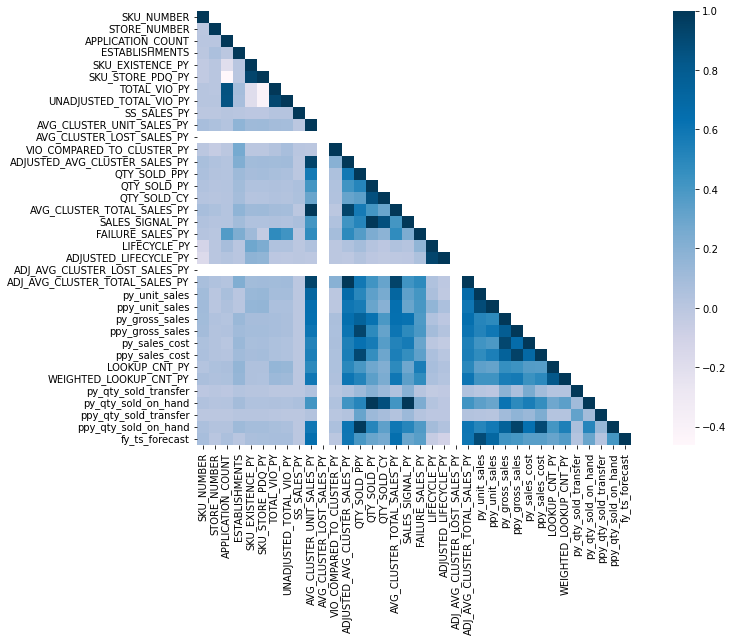

In [3]:
plt.figure(figsize=(15,8))

corr = filters_pi_model.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

for i in range(len(mask)):
    mask[i][i] = False

sns.heatmap(corr, cmap='PuBu', mask=mask, square=True, annot=False)
plt.show()

<AxesSubplot:>

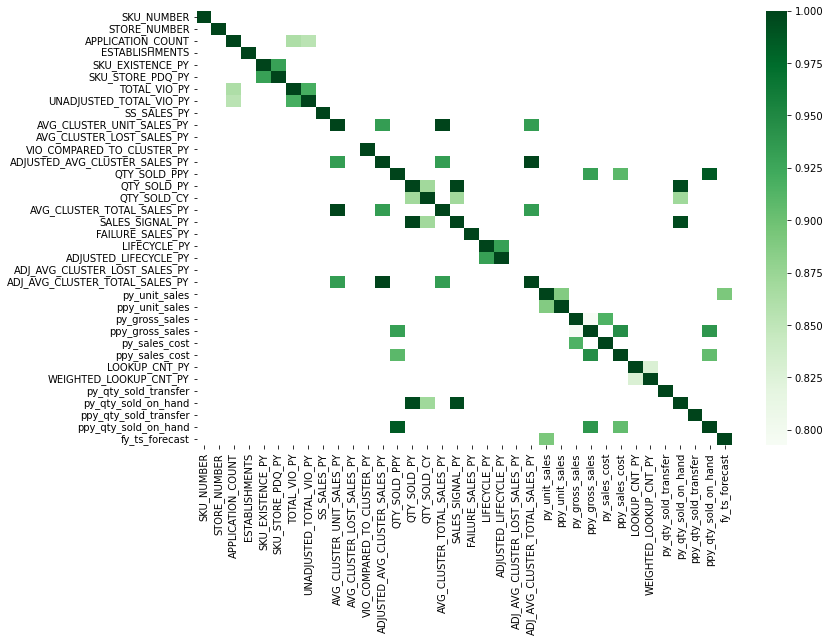

In [96]:
# Plotting correlations above .75

corr = filters_pi_model.corr()

kot = corr[corr>=.75]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

In [99]:
#AVG_CLUSTER_UNIT_SALES_PY
#AVG_CLUSTER_TOTAL_SALES_PY

filters_pi_model[['AVG_CLUSTER_UNIT_SALES_PY','AVG_CLUSTER_TOTAL_SALES_PY']]

,AVG_CLUSTER_UNIT_SALES_PY,AVG_CLUSTER_TOTAL_SALES_PY
0,1.12,1.12
1,0.00,0.00
2,1.13,1.13
3,1.41,1.41
4,0.43,0.43
...,...,...
1042659,15.26,15.26
1042660,15.26,15.26
1042661,19.00,19.00
1042662,1.69,1.69


In [101]:
filters_pi_model[['ADJ_AVG_CLUSTER_TOTAL_SALES_PY','ADJUSTED_AVG_CLUSTER_SALES_PY']]

,ADJ_AVG_CLUSTER_TOTAL_SALES_PY,ADJUSTED_AVG_CLUSTER_SALES_PY
0,0.984925,0.984925
1,0.000000,0.000000
2,1.344129,1.344129
3,0.661467,0.661467
4,0.533914,0.533914
...,...,...
1042659,12.017153,12.017153
1042660,22.262370,22.262370
1042661,28.984394,28.984394
1042662,0.877545,0.877545


In [102]:
filters_pi_model[['SALES_SIGNAL_PY','QTY_SOLD_PY']]

,SALES_SIGNAL_PY,QTY_SOLD_PY
0,1.0,1.0
1,2.0,2.0
2,1.0,1.0
3,0.0,0.0
4,1.0,1.0
...,...,...
1042659,15.0,15.0
1042660,10.0,10.0
1042661,11.0,11.0
1042662,2.0,2.0


In [104]:
filters_pi_model[['SALES_SIGNAL_PY','py_qty_sold_on_hand']]

,SALES_SIGNAL_PY,py_qty_sold_on_hand
0,1.0,1.0
1,2.0,1.0
2,1.0,1.0
3,0.0,0.0
4,1.0,1.0
...,...,...
1042659,15.0,15.0
1042660,10.0,10.0
1042661,11.0,11.0
1042662,2.0,2.0


In [25]:
# DROPPING EQUAL VARIABLES,TOO CORRELATED PREDICTORS, OR EQUAL TO 0
del filters_pi_model['AVG_CLUSTER_UNIT_SALES_PY']
del filters_pi_model['ADJ_AVG_CLUSTER_TOTAL_SALES_PY']
del filters_pi_model['SALES_SIGNAL_PY']
del filters_pi_model['py_qty_sold_on_hand']
del filters_pi_model['ppy_qty_sold_on_hand']
del filters_pi_model['ADJUSTED_LIFECYCLE_PY']
del filters_pi_model['ADJUSTED_AVG_CLUSTER_SALES_PY']
del filters_pi_model['ppy_gross_sales']
del filters_pi_model['ppy_sales_cost']
del filters_pi_model['py_sales_cost']
del filters_pi_model['SKU_STORE_PDQ_PY']
del filters_pi_model['UNADJUSTED_TOTAL_VIO_PY']
del filters_pi_model['AVG_CLUSTER_LOST_SALES_PY']
del filters_pi_model['ADJ_AVG_CLUSTER_LOST_SALES_PY']

<AxesSubplot:>

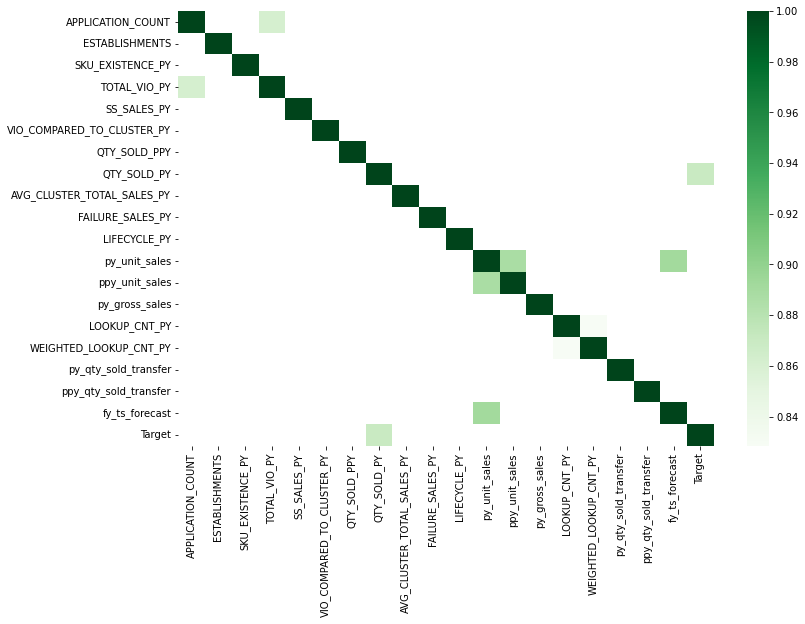

In [13]:
# Plotting AGAIN correlations above .75

corr = filters_pi_model.corr()

kot = corr[corr>=.75]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

In [26]:
# Finals variables

filters_pi_model['Target'] = filters_pi_model['QTY_SOLD_CY']

del filters_pi_model['STORE_NUMBER']
del filters_pi_model['SKU_NUMBER']
del filters_pi_model['QTY_SOLD_CY']

print(filters_pi_model.shape)

(1042664, 20)


In [7]:
filters_pi_model.Target.describe()

count    1.042664e+06
mean     2.543162e+00
std      1.022256e+01
min     -1.700000e+01
25%      0.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      5.704000e+03
Name: Target, dtype: float64

/apps/cent7/jupyterhub/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Target', ylabel='Density'>

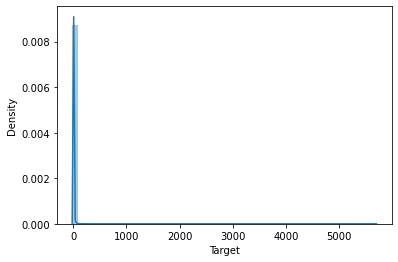

In [8]:
sns.distplot(filters_pi_model['Target'])

<AxesSubplot:>

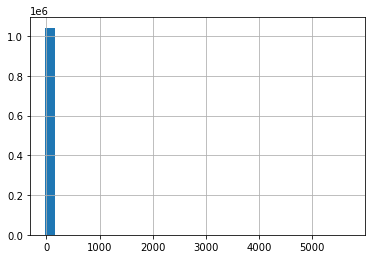

In [9]:
filters_pi_model.Target.hist(bins=32)

In [14]:
filters_pi_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042664 entries, 0 to 1042663
Data columns (total 20 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   APPLICATION_COUNT           1042664 non-null  int64  
 1   ESTABLISHMENTS              1042664 non-null  float64
 2   SKU_EXISTENCE_PY            1042664 non-null  int64  
 3   TOTAL_VIO_PY                1042664 non-null  float64
 4   SS_SALES_PY                 1042664 non-null  float64
 5   VIO_COMPARED_TO_CLUSTER_PY  1042664 non-null  float64
 6   QTY_SOLD_PPY                1042664 non-null  float64
 7   QTY_SOLD_PY                 1042664 non-null  float64
 8   AVG_CLUSTER_TOTAL_SALES_PY  1042664 non-null  float64
 9   FAILURE_SALES_PY            1042664 non-null  float64
 10  LIFECYCLE_PY                1042664 non-null  float64
 11  py_unit_sales               1042664 non-null  float64
 12  ppy_unit_sales              1042664 non-null  float64
 1

In [15]:
filters_pi_model.describe().T

,count,mean,std,min,25%,50%,75%,max
APPLICATION_COUNT,1042664.0,333.472750,1460.062680,0.000000,36.000000,104.000000,277.000000,18130.000000
ESTABLISHMENTS,1042664.0,352.904610,256.422029,0.000000,198.280000,305.340000,450.810000,2462.500000
SKU_EXISTENCE_PY,1042664.0,10.606806,1.709068,0.000000,11.000000,11.000000,11.000000,11.000000
TOTAL_VIO_PY,1042664.0,150.390248,692.974600,0.000000,12.900711,48.249230,115.962946,29509.149324
SS_SALES_PY,1042664.0,0.000046,0.024385,0.000000,0.000000,0.000000,0.000000,24.000000
VIO_COMPARED_TO_CLUSTER_PY,1042664.0,1.000147,0.334514,0.140124,0.783655,0.987045,1.148257,5.221004
QTY_SOLD_PPY,1042664.0,2.189446,5.903708,-6.000000,0.000000,0.000000,2.000000,1261.000000
QTY_SOLD_PY,1042664.0,2.357584,8.255684,-12.000000,0.000000,1.000000,3.000000,4020.000000
AVG_CLUSTER_TOTAL_SALES_PY,1042664.0,2.146858,3.521330,-1.000000,0.300000,1.200000,2.700000,119.000000
FAILURE_SALES_PY,1042664.0,8.016105,14.002833,0.000000,1.197686,3.717206,8.708359,434.895853


In [27]:
# Splitting the data into training and test dataset
X = filters_pi_model.drop('Target',axis=1).values
y = filters_pi_model.Target.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=123)

In [28]:
# Using sklearn StandardScaler for Predictors and Target

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_val_sc = scaler.transform(X_val)
X_test_sc = scaler.transform(X_test)

# LASSO

In [11]:
# Lasso Model

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from math import sqrt

reg = Lasso(alpha=1)
reg.fit(X_train_sc, y_train)

# Training data
pred_train = reg.predict(X_train_sc)
mse_train = mean_squared_error(y_train, pred_train)
rmse_t = sqrt(mse_train)
print('RMSE Training set: %f' % rmse_t)

# Validation data
pred = reg.predict(X_val_sc)
mse_val = mean_squared_error(y_val, pred)
rmse_val = sqrt(mse_val)
print('RMSE Validation set: %f' % rmse_val)

RMSE Training set: 5.575104
RMSE Validation set: 3.891368


In [12]:
# Test data
pred = reg.predict(X_test_sc)
mse_test =mean_squared_error(y_test, pred)
rmse_test= sqrt(mse_test)
print('RMSE Test set: %f' % rmse_test)

RMSE Test set: 3.996970


In [13]:
# Best Lasso
from sklearn.linear_model import LassoCV
# Lasso with 10 fold cross-validation
model = LassoCV(cv=10, random_state=0, max_iter=10000)
model.fit(X_train_sc, y_train)

LassoCV(cv=10, max_iter=10000, random_state=0)

In [14]:
print(model.alpha_)

0.01726675568007616


In [15]:
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train_sc, y_train)

# Training data
pred_train = lasso_best.predict(X_train_sc)
mse_train = mean_squared_error(y_train, pred_train)
rmse_t = sqrt(mse_train)
print('RMSE Training set: %f' % rmse_t)

# Validation data
pred = lasso_best.predict(X_val_sc)
mse_val =mean_squared_error(y_val, pred)
rmse_val = sqrt(mse_val)
print('RMSE Validation set: %f' % rmse_val)

RMSE Training set: 4.983484
RMSE Validation set: 3.803584


In [16]:
lasso_best.coef_

array([-0.0543223 ,  0.10626822,  0.        ,  0.        , -0.04144774,
        0.02987908, -0.18226874, 11.00220145,  0.05648297,  0.09565357,
       -0.04081372, -0.04305296, -0.54532378, -3.08914671,  0.22761573,
        0.12758673, -0.27449391, -0.03374983,  0.97891611])

In [17]:
# Test data
pred = lasso_best.predict(X_test_sc)
mse_test =mean_squared_error(y_test, pred)
rmse_test= sqrt(mse_test)
print('RMSE Test set: %f' % rmse_test)

RMSE Test set: 4.049557


# MULTIPLE LINEAR REGRESSION

In [18]:
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train_sc, y_train)

LinearRegression()

In [19]:
# Training data
pred_train = LR.predict(X_train_sc)
mse_train = mean_squared_error(y_train, pred_train)
rmse_t = sqrt(mse_train)
print('RMSE Training set: %f' % rmse_t)

# Validation data
pred = LR.predict(X_val_sc)
mse_val = mean_squared_error(y_val, pred)
rmse_val = sqrt(mse_val)
print('RMSE Validation set: %f' % rmse_val)

# Test data
pred = LR.predict(X_test_sc)
mse_test =mean_squared_error(y_test, pred)
rmse_test= sqrt(mse_test)
print('RMSE Test set: %f' % rmse_test)

RMSE Training set: 4.982042
RMSE Validation set: 3.805782
RMSE Test set: 4.070064


# POLYNOMIAL REGRESSION

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                    ('linear', LinearRegression(fit_intercept=False))])

model.fit(X_train_sc, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('linear', LinearRegression(fit_intercept=False))])

In [29]:
# Training data
pred_train = model.predict(X_train_sc)
mse_train = mean_squared_error(y_train, pred_train)
rmse_t = sqrt(mse_train)
print('RMSE Training set: %f' % rmse_t)

# Validation data
pred = model.predict(X_val_sc)
mse_val = mean_squared_error(y_val, pred)
rmse_val = sqrt(mse_val)
print('RMSE Validation set: %f' % rmse_val)

# Test data
pred = model.predict(X_test_sc)
mse_test =mean_squared_error(y_test, pred)
rmse_test= sqrt(mse_test)
print('RMSE Test set: %f' % rmse_test)

RMSE Training set: 4.072970
RMSE Validation set: 71061273.400818
RMSE Test set: 289653844450.376343


In [35]:
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                    ('linear', LinearRegression(fit_intercept=False))])

model.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('linear', LinearRegression(fit_intercept=False))])

In [36]:
# Training data
pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
rmse_t = sqrt(mse_train)
print('RMSE Training set: %f' % rmse_t)

# Validation data
pred = model.predict(X_val)
mse_val = mean_squared_error(y_val, pred)
rmse_val = sqrt(mse_val)
print('RMSE Validation set: %f' % rmse_val)

# Test data
pred = model.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
rmse_test= sqrt(mse_test)
print('RMSE Test set: %f' % rmse_test)

RMSE Training set: 4.072954
RMSE Validation set: 5.648243
RMSE Test set: 11.900884


In [37]:
model = Pipeline([('poly', PolynomialFeatures(interaction_only=True)),
                    ('linear', LinearRegression(fit_intercept=False))])

model.fit(X_train_sc, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(interaction_only=True)),
                ('linear', LinearRegression(fit_intercept=False))])

In [38]:
# Training data
pred_train = model.predict(X_train_sc)
mse_train = mean_squared_error(y_train, pred_train)
rmse_t = sqrt(mse_train)
print('RMSE Training set: %f' % rmse_t)

# Validation data
pred = model.predict(X_val_sc)
mse_val = mean_squared_error(y_val, pred)
rmse_val = sqrt(mse_val)
print('RMSE Validation set: %f' % rmse_val)

# Test data
pred = model.predict(X_test_sc)
mse_test =mean_squared_error(y_test, pred)
rmse_test= sqrt(mse_test)
print('RMSE Test set: %f' % rmse_test)

RMSE Training set: 4.111898
RMSE Validation set: 6.023968
RMSE Test set: 4994422308.295555


In [39]:
model = Pipeline([('poly', PolynomialFeatures(interaction_only=True)),
                    ('linear', LinearRegression(fit_intercept=False))])

model.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(interaction_only=True)),
                ('linear', LinearRegression(fit_intercept=False))])

In [40]:
# Training data
pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
rmse_t = sqrt(mse_train)
print('RMSE Training set: %f' % rmse_t)

# Validation data
pred = model.predict(X_val)
mse_val = mean_squared_error(y_val, pred)
rmse_val = sqrt(mse_val)
print('RMSE Validation set: %f' % rmse_val)

# Test data
pred = model.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
rmse_test= sqrt(mse_test)
print('RMSE Test set: %f' % rmse_test)

RMSE Training set: 4.111898
RMSE Validation set: 6.024230
RMSE Test set: 8.438147


# RANDOM FOREST REGRESSOR

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

RF = RandomForestRegressor(max_depth=3, random_state=0)

RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, random_state=0)

In [15]:
# Training data
pred_train = RF.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
rmse_t = sqrt(mse_train)
print('RMSE Training set: %f' % rmse_t)

# Validation data
pred = RF.predict(X_val)
mse_val = mean_squared_error(y_val, pred)
rmse_val = sqrt(mse_val)
print('RMSE Validation set: %f' % rmse_val)

# Test data
pred = RF.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
rmse_test= sqrt(mse_test)
print('RMSE Test set: %f' % rmse_test)

RMSE Training set: 4.959306
RMSE Validation set: 4.269221
RMSE Test set: 4.160543


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

RF = RandomForestRegressor(n_estimators=150, max_depth=4, random_state=0)

RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=150, random_state=0)

In [30]:
# Training data
pred_train = RF.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
rmse_t = sqrt(mse_train)
print('RMSE Training set: %f' % rmse_t)

# Validation data
pred = RF.predict(X_val)
mse_val = mean_squared_error(y_val, pred)
rmse_val = sqrt(mse_val)
print('RMSE Validation set: %f' % rmse_val)

# Test data
pred = RF.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
rmse_test= sqrt(mse_test)
print('RMSE Test set: %f' % rmse_test)

RMSE Training set: 4.558487
RMSE Validation set: 3.921003
RMSE Test set: 3.872879


In [20]:
RF = RandomForestRegressor(n_estimators=130, max_depth=5, max_features=3, random_state=0)

RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, max_features=3, n_estimators=130,
                      random_state=0)

In [21]:
# Training data
pred_train = RF.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
rmse_t = sqrt(mse_train)
print('RMSE Training set: %f' % rmse_t)

# Validation data
pred = RF.predict(X_val)
mse_val = mean_squared_error(y_val, pred)
rmse_val = sqrt(mse_val)
print('RMSE Validation set: %f' % rmse_val)

# Test data
pred = RF.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
rmse_test= sqrt(mse_test)
print('RMSE Test set: %f' % rmse_test)

RMSE Training set: 6.962499
RMSE Validation set: 4.427458
RMSE Test set: 6.646336


In [31]:
RF = RandomForestRegressor(n_estimators=200, max_depth=4, random_state=0)

RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=200, random_state=0)

In [32]:
# Training data
pred_train = RF.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
rmse_t = sqrt(mse_train)
print('RMSE Training set: %f' % rmse_t)

# Validation data
pred = RF.predict(X_val)
mse_val = mean_squared_error(y_val, pred)
rmse_val = sqrt(mse_val)
print('RMSE Validation set: %f' % rmse_val)

# Test data
pred = RF.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
rmse_test= sqrt(mse_test)
print('RMSE Test set: %f' % rmse_test)

RMSE Training set: 4.593665
RMSE Validation set: 3.903326
RMSE Test set: 3.899848
